# Project 1: Analysis of Various Metrics and How They Relate to Stress and Work-Life Balance

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

## Data Cleaning and Exploration

In [3]:
# Read csv file
wellbeing_df = pd.read_csv('data/Wellbeing_and_lifestyle_data_Kaggle.csv')
wellbeing_df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [4]:
wellbeing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [5]:
# Check the datatypes of each column
column_data_types = wellbeing_df.dtypes
print(column_data_types)

Timestamp                   object
FRUITS_VEGGIES               int64
DAILY_STRESS                object
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                         object
GENDER                      object
WORK_LIFE_BALANCE_SCORE    float64
dtype: object


In [6]:
# Change the datatype of the stress column to an integer

# First find the row(s) that is NOT a number on the stress scale
stress_scores = wellbeing_df['DAILY_STRESS'].unique()

# Convert the stress scores into a list
stress_scores_list = list(stress_scores)
print(stress_scores_list)

# From the list, drop the values that are not valid stress scores
invalid_response = '1/1/00'

# Create a variable to filter for the invalid response
drop_response = (wellbeing_df['DAILY_STRESS'] == invalid_response)

# Drop the row containing the invalid response
wellbeing_df = wellbeing_df.loc[~drop_response]
wellbeing_df

# Convert the daily stress column to an integer and check it was converted correctly
wellbeing_df['DAILY_STRESS'] = wellbeing_df['DAILY_STRESS'].astype(int)
wellbeing_df.info()


['2', '3', '1', '4', '5', '0', '1/1/00']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15971 non-null  object 
 1   FRUITS_VEGGIES           15971 non-null  int64  
 2   DAILY_STRESS             15971 non-null  int32  
 3   PLACES_VISITED           15971 non-null  int64  
 4   CORE_CIRCLE              15971 non-null  int64  
 5   SUPPORTING_OTHERS        15971 non-null  int64  
 6   SOCIAL_NETWORK           15971 non-null  int64  
 7   ACHIEVEMENT              15971 non-null  int64  
 8   DONATION                 15971 non-null  int64  
 9   BMI_RANGE                15971 non-null  int64  
 10  TODO_COMPLETED           15971 non-null  int64  
 11  FLOW                     15971 non-null  int64  
 12  DAILY_STEPS              15971 non-null  int64  
 13  LIVE_VISION              15971 non-

In [7]:
# Find the total number of participants in the study
total_participants = wellbeing_df['Timestamp'].count()

# Find the total number of males
male_df = wellbeing_df[wellbeing_df['GENDER']=='Male']
male_count = male_df['Timestamp'].count()

# Find the total number of females
female_df = wellbeing_df[wellbeing_df['GENDER']=='Female']
female_count = female_df['Timestamp'].count()

print(f'The total number of participants is {total_participants}')
print(f'The total number of males is {male_count}')
print(f'The total number of females is {female_count}')

The total number of participants is 15971
The total number of males is 6113
The total number of females is 9858


## Data Analysis for Mental Health Practices

### Mental Health Practices versus Work Life Balance Scores

In [8]:
# Create a new dataframe with the columns for flow, weekly meditation,
# and daily shouting
mental_health_df = wellbeing_df[['AGE','GENDER','FLOW',
                                 'WEEKLY_MEDITATION', 'DAILY_SHOUTING',
                                 'DAILY_STRESS','WORK_LIFE_BALANCE_SCORE']]
# Rename the columns
mental_health_df = mental_health_df.rename(columns={'AGE':'Age','GENDER':'Gender','FLOW':'Flow','WEEKLY_MEDITATION':'Weekly Meditation',
                                 'DAILY_SHOUTING':'Daily Shouting','DAILY_STRESS':'Daily Stress','WORK_LIFE_BALANCE_SCORE':'Work Life Balance Score'},copy=False)
mental_health_df.head()                                

,Age,Gender,Flow,Weekly Meditation,Daily Shouting,Daily Stress,Work Life Balance Score
0,36 to 50,Female,4,5,5,2,609.5
1,36 to 50,Female,2,6,2,3,655.6
2,36 to 50,Female,2,3,2,3,631.6
3,51 or more,Female,5,0,5,3,622.7
4,51 or more,Female,0,5,0,1,663.9


In [9]:
# From the mental health df, create one for males and one for females 
male_mental_health = mental_health_df[mental_health_df['Gender'] == 'Male']
male_mental_health.head()
female_mental_health = mental_health_df[mental_health_df['Gender'] == 'Female']
female_mental_health.head()

,Age,Gender,Flow,Weekly Meditation,Daily Shouting,Daily Stress,Work Life Balance Score
0,36 to 50,Female,4,5,5,2,609.5
1,36 to 50,Female,2,6,2,3,655.6
2,36 to 50,Female,2,3,2,3,631.6
3,51 or more,Female,5,0,5,3,622.7
4,51 or more,Female,0,5,0,1,663.9


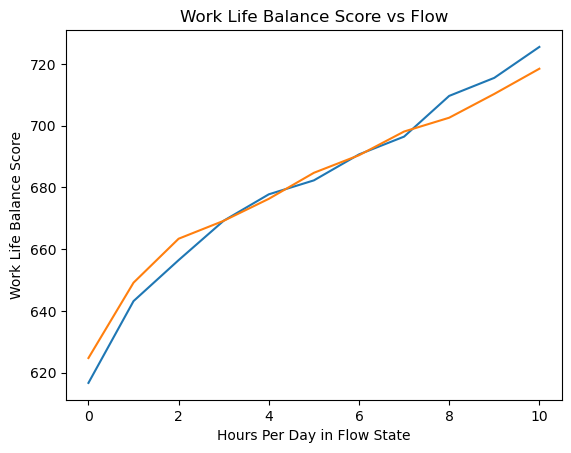

In [10]:
# Line plot for flow

# First create 2 new df for males and females , grouped by Flow with the mean of each
# work life balance score per flow group
male_flow = male_mental_health.groupby('Flow')['Work Life Balance Score'].mean()
female_flow = female_mental_health.groupby('Flow')['Work Life Balance Score'].mean()
# Plot the data
male_flow.plot()
female_flow.plot()
# Create x and y labels and title
plt.xlabel('Hours Per Day in Flow State')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Flow')
plt.show()

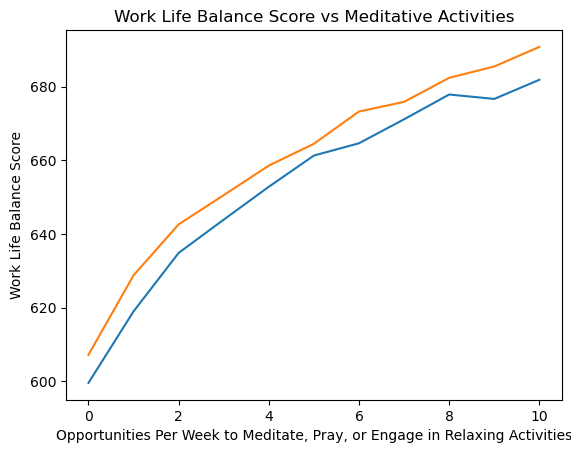

In [11]:
# Sort the weekly meditation by gender and create 2 new dataframes
male_meditation = male_mental_health.groupby('Weekly Meditation')['Work Life Balance Score'].mean()
female_meditation = female_mental_health.groupby('Weekly Meditation')['Work Life Balance Score'].mean()

# Plot the line curves for males and females
male_meditation.plot()
female_meditation.plot()

plt.xlabel('Opportunities Per Week to Meditate, Pray, or Engage in Relaxing Activities')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Meditative Activities')
plt.show()

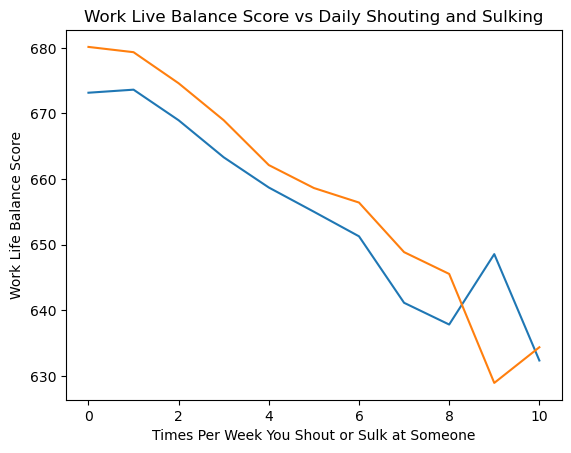

In [12]:
# Sort daily shouting by gender and create new dataframes for each 
male_shouting = male_mental_health.groupby('Daily Shouting')['Work Life Balance Score'].mean()
female_shouting = female_mental_health.groupby('Daily Shouting')['Work Life Balance Score'].mean()

# Plot the lines for males and females 
male_shouting.plot()
female_shouting.plot()

plt.xlabel('Times Per Week You Shout or Sulk at Someone')
plt.ylabel('Work Life Balance Score')
plt.title('Work Live Balance Score vs Daily Shouting and Sulking')
plt.show()

### Mental Health Practices versus Stress

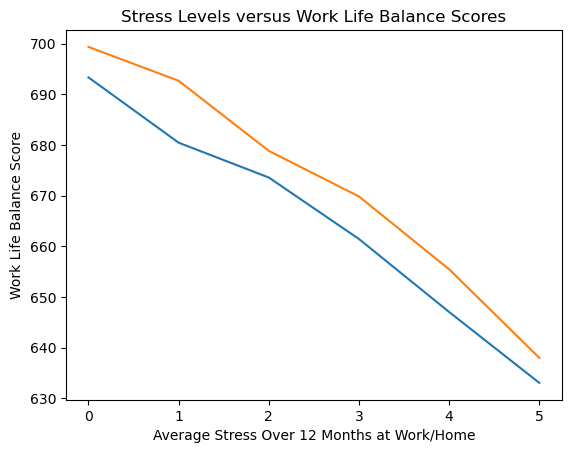

In [13]:
# First graph stress compared with work life balance 
male_stress = male_mental_health.groupby('Daily Stress')['Work Life Balance Score'].mean()
female_stress = female_mental_health.groupby('Daily Stress')['Work Life Balance Score'].mean()

# Plot the lines
male_stress.plot()
female_stress.plot()

plt.xlabel('Average Stress Over 12 Months at Work/Home')
plt.ylabel('Work Life Balance Score')
plt.title('Stress Levels versus Work Life Balance Scores')
plt.show()

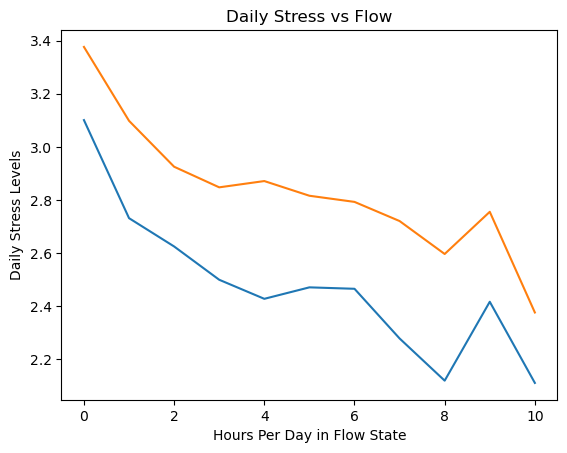

In [14]:
# Check how stress relates to other metrics associated with high work life balance scores 
# First check flow versus stress
male_stressflow = male_mental_health.groupby('Flow')['Daily Stress'].mean()
female_stressflow = female_mental_health.groupby('Flow')['Daily Stress'].mean()

# Plot the lines 
male_stressflow.plot()
female_stressflow.plot()

plt.xlabel('Hours Per Day in Flow State')
plt.ylabel('Daily Stress Levels')
plt.title('Daily Stress vs Flow')
plt.show()

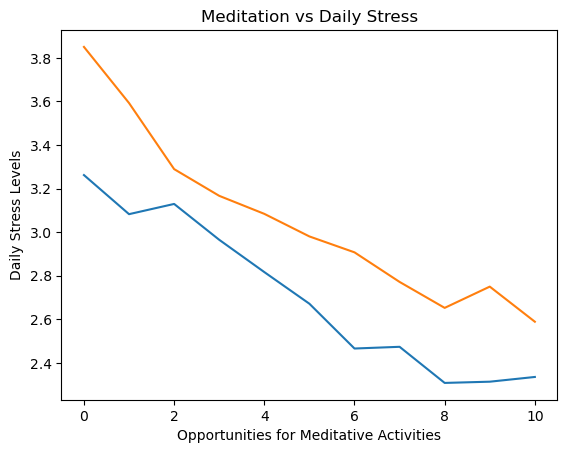

In [15]:
# Check meditative activities versus stress
male_stress_med = male_mental_health.groupby('Weekly Meditation')['Daily Stress'].mean()
female_stress_med = female_mental_health.groupby('Weekly Meditation')['Daily Stress'].mean()

# Plot the lines 
male_stress_med.plot()
female_stress_med.plot()

plt.xlabel('Opportunities for Meditative Activities')
plt.ylabel('Daily Stress Levels')
plt.title('Meditation vs Daily Stress')
plt.show()

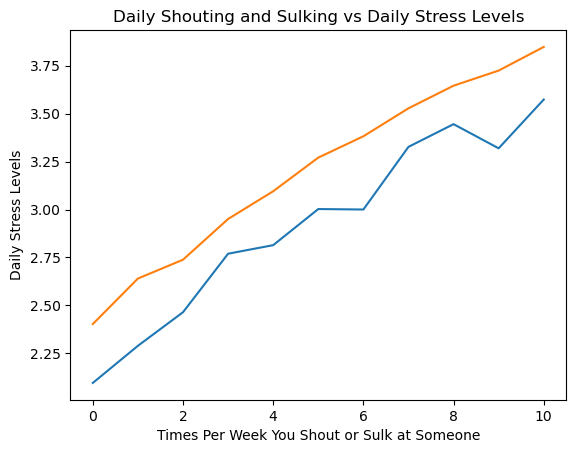

In [16]:
# Check stress levels versus daily shouting
male_stress_shouting = male_mental_health.groupby('Daily Shouting')['Daily Stress'].mean()
female_stress_shouting = female_mental_health.groupby('Daily Shouting')['Daily Stress'].mean()

# Plot the lines for males and females 
male_stress_shouting.plot()
female_stress_shouting.plot()

plt.xlabel('Times Per Week You Shout or Sulk at Someone')
plt.ylabel('Daily Stress Levels')
plt.title('Daily Shouting and Sulking vs Daily Stress Levels')
plt.show()

### Mental Health Practices versus Work Life Balance Scores By Age

In [21]:
# Create a dataframe just for age 
age_mental_health = mental_health_df[mental_health_df['Age']=='21 to 35']
age_mental_health

# Create male and female dataframes from this
male_age_mental_health = age_mental_health[age_mental_health['Gender']=='Male']
female_age_mental_health = age_mental_health[age_mental_health['Gender']=='Female']

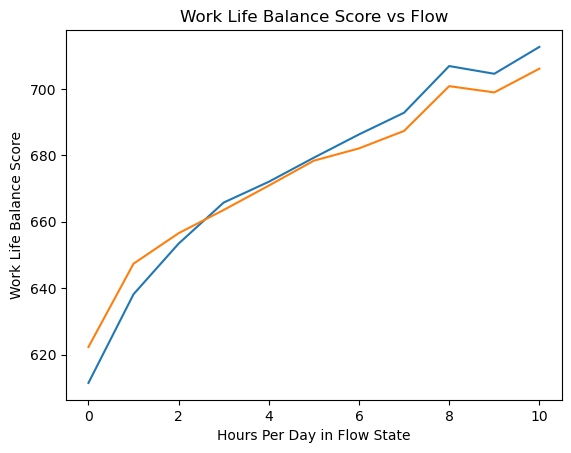

In [22]:
# Line plot for flow

# First create 2 new df for males and females , grouped by Flow with the mean of each
# work life balance score per flow group
male_age_flow = male_age_mental_health.groupby('Flow')['Work Life Balance Score'].mean()
female_age_flow = female_age_mental_health.groupby('Flow')['Work Life Balance Score'].mean()
# Plot the data
male_age_flow.plot()
female_age_flow.plot()
# Create x and y labels and title
plt.xlabel('Hours Per Day in Flow State')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Flow')
plt.show()

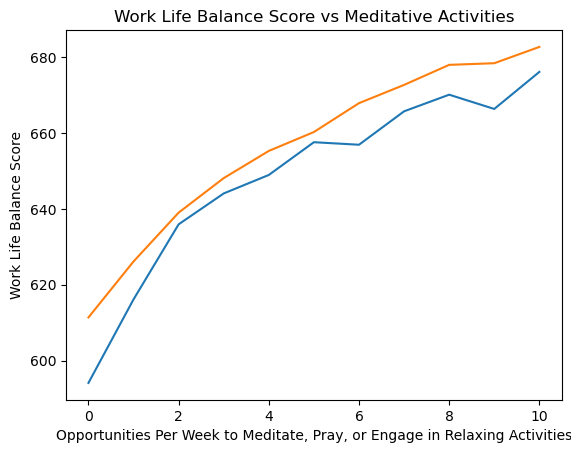

In [23]:
# Sort the weekly meditation by gender and create 2 new dataframes
male_age_meditation = male_age_mental_health.groupby('Weekly Meditation')['Work Life Balance Score'].mean()
female_age_meditation = female_age_mental_health.groupby('Weekly Meditation')['Work Life Balance Score'].mean()

# Plot the line curves for males and females
male_age_meditation.plot()
female_age_meditation.plot()

plt.xlabel('Opportunities Per Week to Meditate, Pray, or Engage in Relaxing Activities')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Meditative Activities')
plt.show()

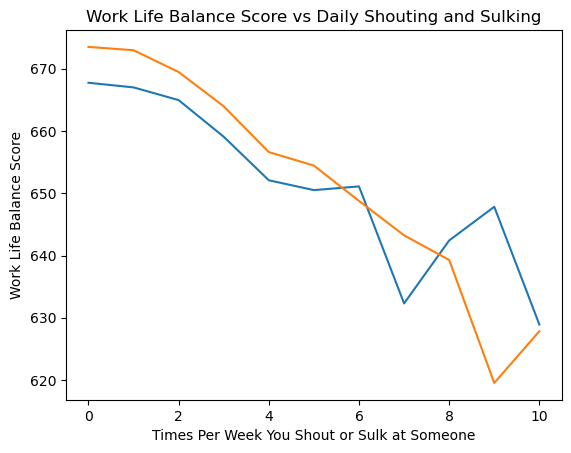

In [29]:
# Sort daily shouting by gender and create new dataframes for each 
male_age_shouting = male_age_mental_health.groupby('Daily Shouting')['Work Life Balance Score'].mean()
female_age_shouting = female_age_mental_health.groupby('Daily Shouting')['Work Life Balance Score'].mean()

# Plot the lines for males and females 
male_age_shouting.plot()
female_age_shouting.plot()

plt.xlabel('Times Per Week You Shout or Sulk at Someone')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Daily Shouting and Sulking')
plt.show()

### Mental Health Practices versus Stress Levels by Age 

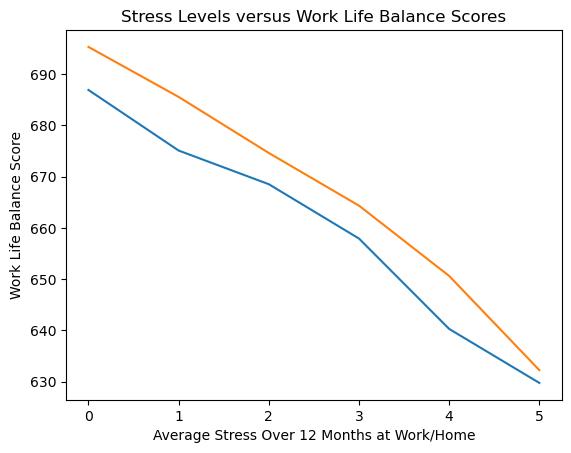

In [25]:
# First graph stress compared with work life balance 
male_age_stress = male_age_mental_health.groupby('Daily Stress')['Work Life Balance Score'].mean()
female_age_stress = female_age_mental_health.groupby('Daily Stress')['Work Life Balance Score'].mean()

# Plot the lines
male_age_stress.plot()
female_age_stress.plot()

plt.xlabel('Average Stress Over 12 Months at Work/Home')
plt.ylabel('Work Life Balance Score')
plt.title('Stress Levels versus Work Life Balance Scores')
plt.show()

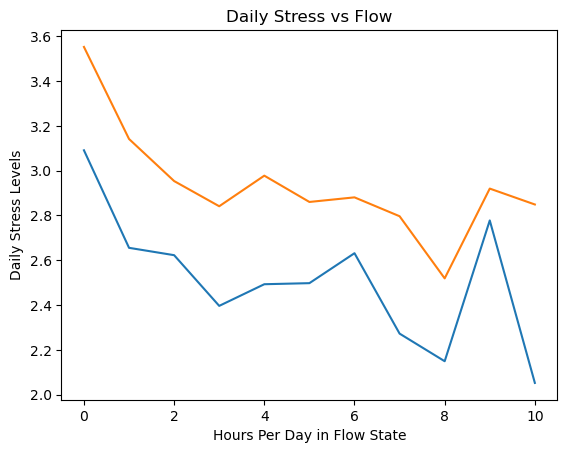

In [26]:
# Check how stress relates to other metrics associated with high work life balance scores 
# First check flow versus stress
male_age_stressflow = male_age_mental_health.groupby('Flow')['Daily Stress'].mean()
female_age_stressflow = female_age_mental_health.groupby('Flow')['Daily Stress'].mean()

# Plot the lines 
male_age_stressflow.plot()
female_age_stressflow.plot()

plt.xlabel('Hours Per Day in Flow State')
plt.ylabel('Daily Stress Levels')
plt.title('Daily Stress vs Flow')
plt.show()

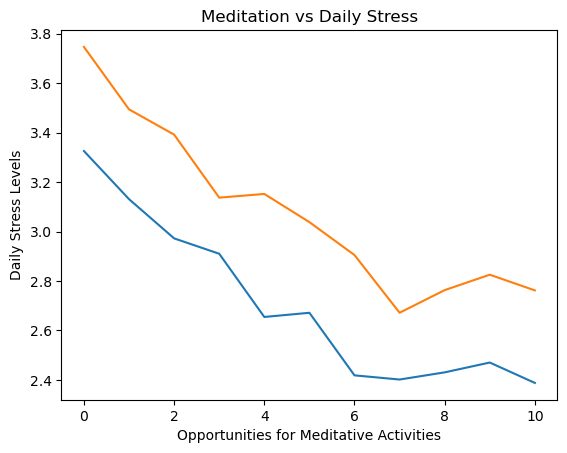

In [27]:
# Check meditative activities versus stress
male_age_stress_med = male_age_mental_health.groupby('Weekly Meditation')['Daily Stress'].mean()
female_age_stress_med = female_age_mental_health.groupby('Weekly Meditation')['Daily Stress'].mean()

# Plot the lines 
male_age_stress_med.plot()
female_age_stress_med.plot()

plt.xlabel('Opportunities for Meditative Activities')
plt.ylabel('Daily Stress Levels')
plt.title('Meditation vs Daily Stress')
plt.show()

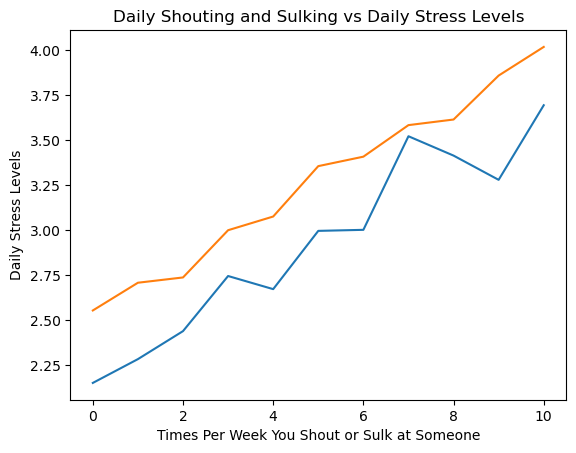

In [28]:
# Check stress levels versus daily shouting
male_age_stress_shouting = male_age_mental_health.groupby('Daily Shouting')['Daily Stress'].mean()
female_age_stress_shouting = female_age_mental_health.groupby('Daily Shouting')['Daily Stress'].mean()

# Plot the lines for males and females 
male_age_stress_shouting.plot()
female_age_stress_shouting.plot()

plt.xlabel('Times Per Week You Shout or Sulk at Someone')
plt.ylabel('Daily Stress Levels')
plt.title('Daily Shouting and Sulking vs Daily Stress Levels')
plt.show()